# Trabajo Práctico N° 3: Clustering
## Natalia Mellino

In [1]:
# imports
library(MASS)
# install.packages("e1071") 
library(e1071)

## Ejercicio 1

### Apartado a)

 sp      sex         index            FL              RW              CL       
 B:100   F:100   Min.   : 1.0   Min.   : 7.20   Min.   : 6.50   Min.   :14.70  
 O:100   M:100   1st Qu.:13.0   1st Qu.:12.90   1st Qu.:11.00   1st Qu.:27.27  
                 Median :25.5   Median :15.55   Median :12.80   Median :32.10  
                 Mean   :25.5   Mean   :15.58   Mean   :12.74   Mean   :32.11  
                 3rd Qu.:38.0   3rd Qu.:18.05   3rd Qu.:14.30   3rd Qu.:37.23  
                 Max.   :50.0   Max.   :23.10   Max.   :20.20   Max.   :47.60  
       CW              BD       
 Min.   :17.10   Min.   : 6.10  
 1st Qu.:31.50   1st Qu.:11.40  
 Median :36.80   Median :13.90  
 Mean   :36.41   Mean   :14.03  
 3rd Qu.:42.00   3rd Qu.:16.60  
 Max.   :54.60   Max.   :21.60  

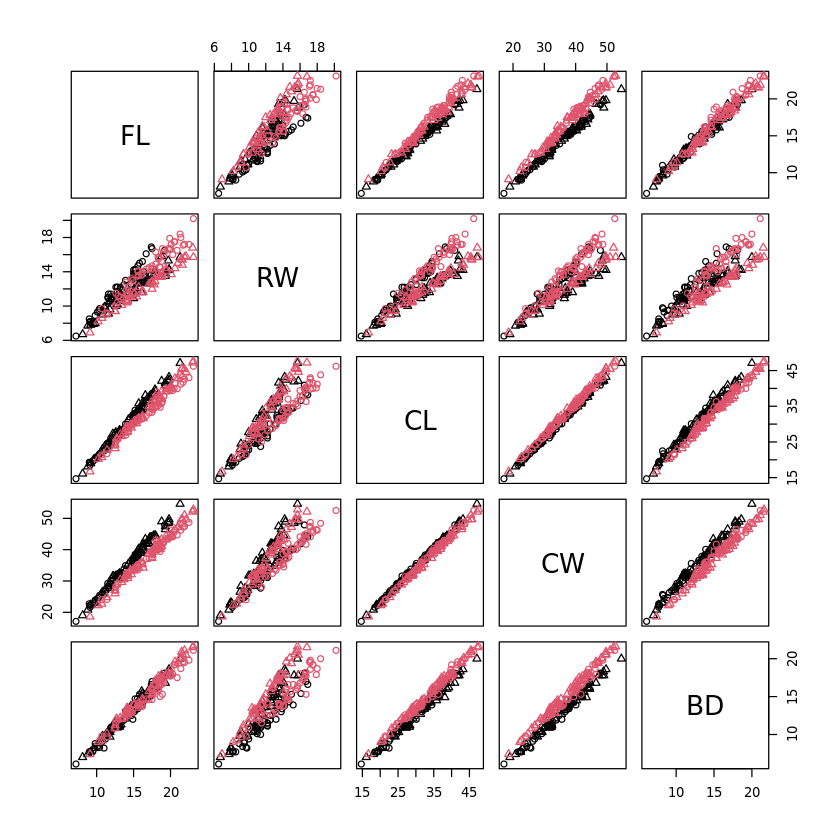

In [2]:
data(crabs)
summary(crabs)
plot(crabs[,4:8],col=as.numeric(crabs[,1]),pch=as.numeric(crabs[,2]))


 Analizamos primero con KMeans

In [32]:
# Lo convertimos a escala logaritmica y le hacemos un scale
crabs.log <- crabs
crabs.log[,4:8] <- log(crabs[,4:8])
crabs.log.scaled <- crabs.log
crabs.log.scaled[, 4:8] <- scale(crabs.log[,4:8])
# Aplicamos un scale luego de hacer el prcomp ya que no veíamos mejoras
crabs.log.scaled.pca <- prcomp(crabs.log.scaled[,4:8], retx=TRUE)$x
crabs.log.scaled.pca.scaled <- scale(crabs.log.scaled.pca)


In [33]:
crab.log.km <- kmeans(crabs.log[, 4:8], cent=2)
crab.log.scaled.km <- kmeans(crabs.log.scaled[, 4:8], cent=2)
crab.log.scaled.pca.km <- kmeans(crabs.log.scaled.pca, cent=2)
crab.log.scaled.pca.scaled.km <- kmeans(crabs.log.scaled.pca.scaled, cent=2)

In [50]:
check.cluster <- function(cc, original){
  cont.table <- table(original,cc$cluster)
  class.match <- matchClasses(as.matrix(cont.table),method="exact")
  print(cont.table[,class.match])
  print(cont.table)
}

In [51]:
check.cluster(crab.log.km, crabs$sex)
check.cluster(crab.log.km, crabs$sp)

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
        
original  2  1
       F 64 36
       M 61 39
        
original  1  2
       F 36 64
       M 39 61
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
        
original  1  2
       B 48 52
       O 27 73
        
original  1  2
       B 48 52
       O 27 73


In [52]:
check.cluster(crab.log.scaled.km, crabs$sex)
check.cluster(crab.log.scaled.km, crabs$sp)

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
        
original  1  2
       F 64 36
       M 61 39
        
original  1  2
       F 64 36
       M 61 39
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
        
original  2  1
       B 48 52
       O 27 73
        
original  1  2
       B 52 48
       O 73 27


In [53]:
check.cluster(crab.log.scaled.pca.km, crabs$sex)
check.cluster(crab.log.scaled.pca.km, crabs$sp)

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
        
original  1  2
       F 64 36
       M 61 39
        
original  1  2
       F 64 36
       M 61 39
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
        
original  2  1
       B 48 52
       O 27 73
        
original  1  2
       B 52 48
       O 73 27


In [54]:
check.cluster(crab.log.scaled.pca.scaled.km, crabs$sex)
check.cluster(crab.log.scaled.pca.scaled.km, crabs$sp)

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 94.5 %
        
original  1  2
       F 90 10
       M  1 99
        
original  1  2
       F 90 10
       M  1 99
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
        
original  2  1
       B 56 44
       O 53 47
        
original  1  2
       B 44 56
       O 47 53


- Observamos que en el caso de kmeans hay que hacer varias transformaciones antes de ver una mejora en la performance.
- Por otro lado, en la mayoría de las corridas para `crab.log.scaled.pca.scaled.km` (que es donde se empieza a ver una mejora), observamos que alcanza una performance por arriba del 90% pero sólo para una de las clases, el sexo. Esto nos indica que el algoritmo aplicado al dataset separa mejor esta clase que la clase 'especie'.

Ahora analizamos con HClust

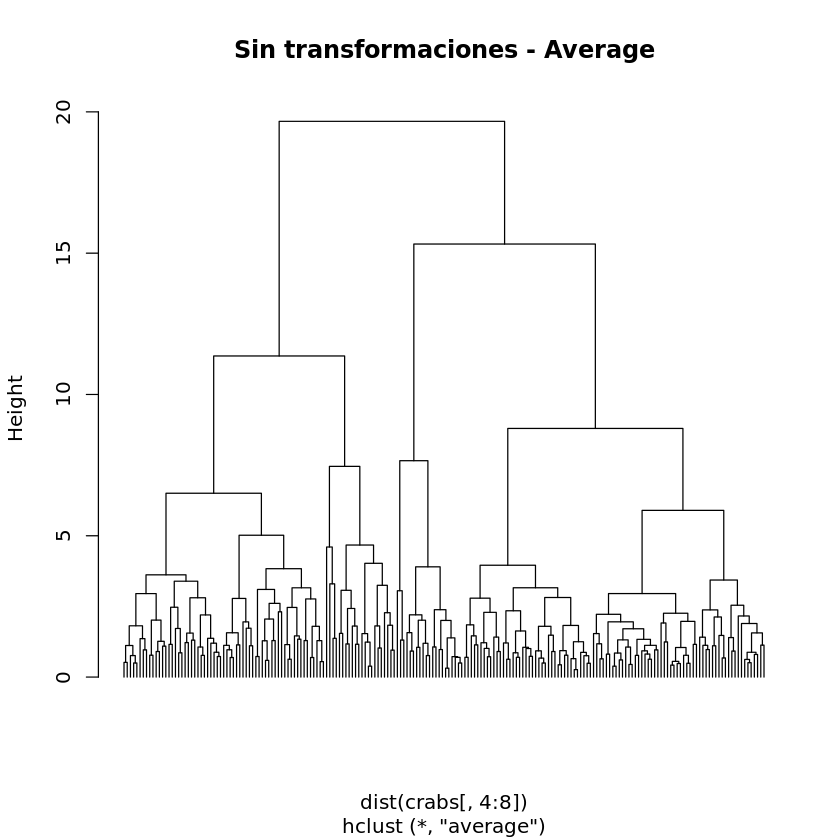

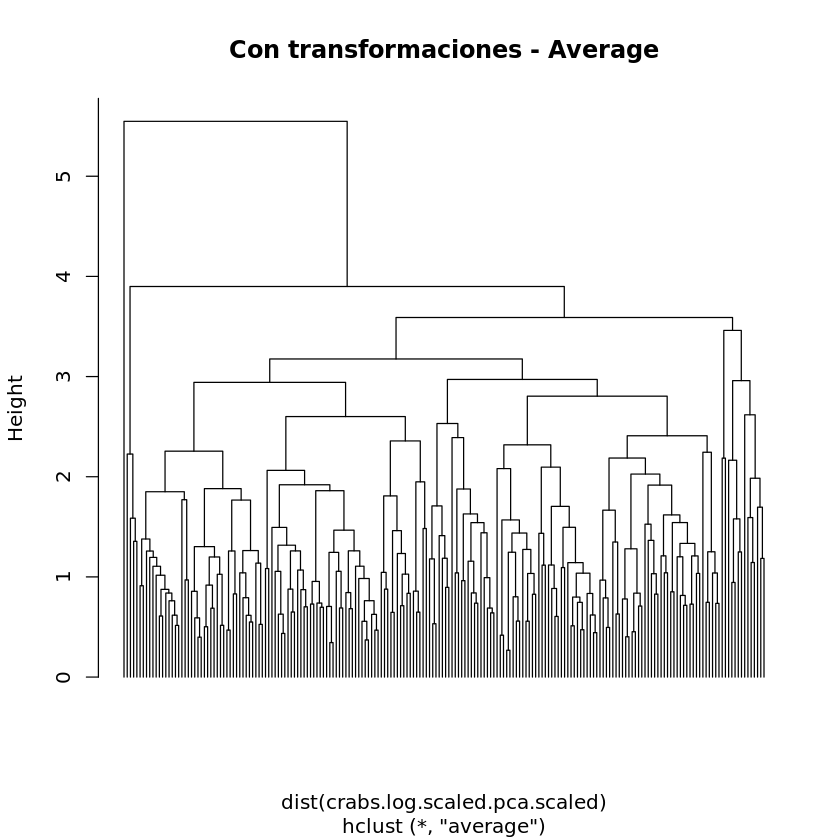

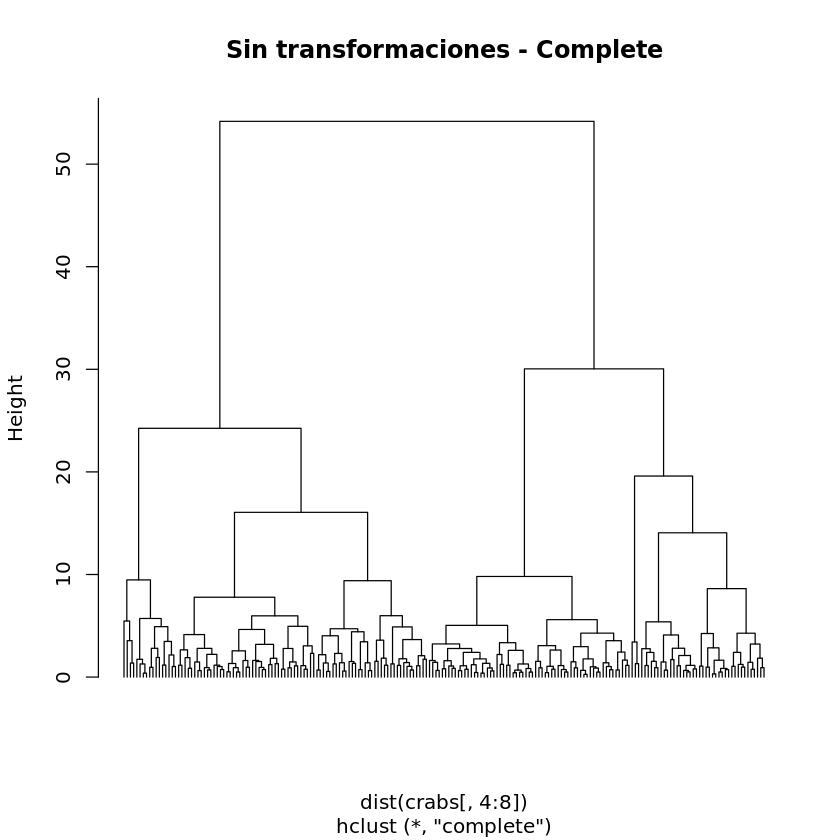

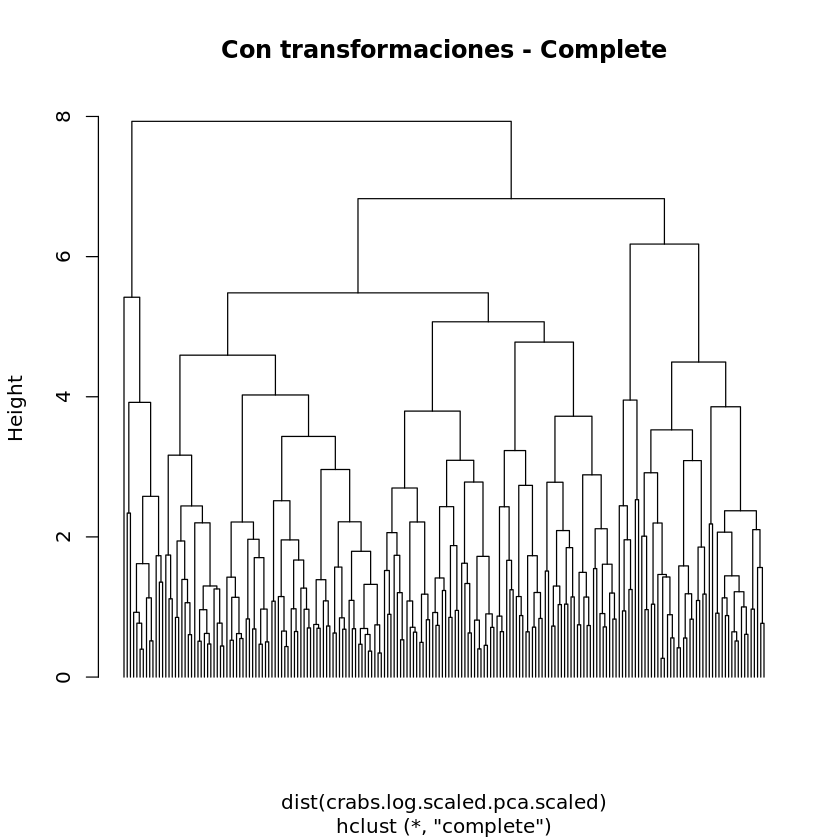

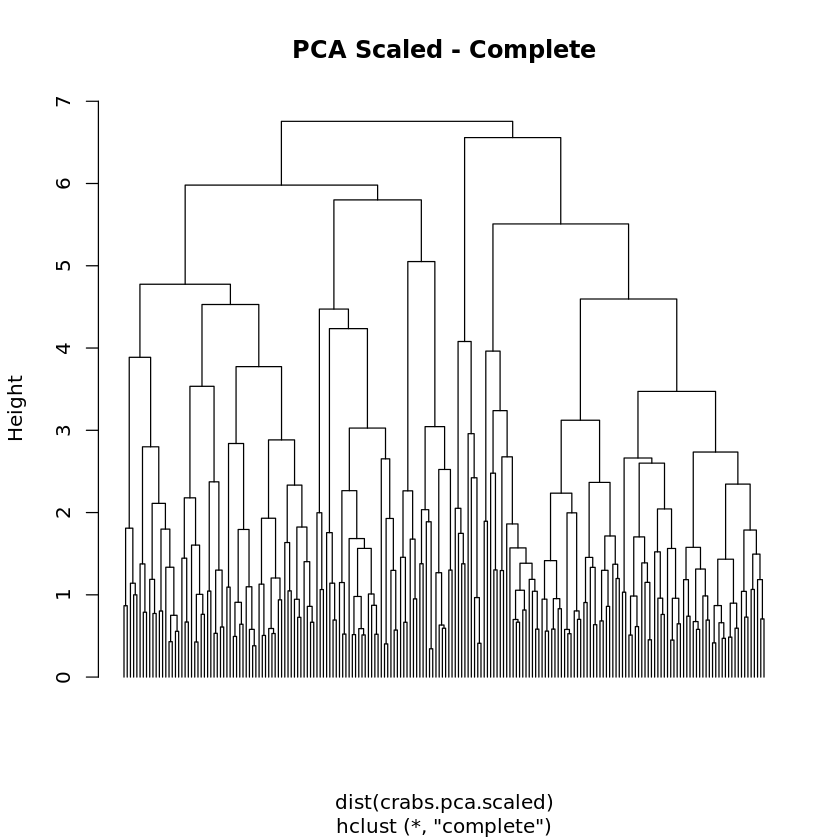

In [87]:
crab.hc.average <- hclust(dist(crabs[, 4:8]), method="average")
crab.log.scaled.pca.scaled.hc.average <- hclust(dist(crabs.log.scaled.pca.scaled), method="average")
plot(crab.hc.average,  labels = FALSE, hang = -1, main = "Sin transformaciones - Average")
plot(crab.log.scaled.pca.scaled.hc.average,  labels = FALSE, hang = -1, main = "Con transformaciones - Average")

crab.hc.single <- hclust(dist(crabs[, 4:8]), method="complete")
crab.log.scaled.pca.scaled.hc.single <- hclust(dist(crabs.log.scaled.pca.scaled), method="complete")
plot(crab.hc.single,  labels = FALSE, hang = -1, main = "Sin transformaciones - Complete")
plot(crab.log.scaled.pca.scaled.hc.single,  labels = FALSE, hang = -1, main = "Con transformaciones - Complete")

crabs.pca.scaled <- scale(prcomp(crabs[,4:8], retx=TRUE)$x)
crab.pca.scaled.hc <- hclust(dist(crabs.pca.scaled), method="complete")
plot(crab.pca.scaled.hc,  labels = FALSE, hang = -1, main = "PCA Scaled - Complete")


### Apartado b)

In [10]:
load("lampone.Rdata")
lampone.vars <- lampone[, -c(1, 143, 144)] # La clase esta en 1 y 143, sacamos la 144 porque da error
head(lampone.vars)


,m33,m34,m35,m36,m40,m41,m42,m43,m44,m45,⋯,m179,m181,m183,m185,m187,m191,m193,m194,m195,m205
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,32.24,0.27,0.06,0.01,0,0.30,0.02,2.05,0.11,918.74,⋯,0,0,0,0,0,0,0.01,0,0,0
12,33.41,0.34,0.05,0.01,0,0.12,0.02,10.42,0.25,873.55,⋯,0,0,0,0,0,0,0.02,0,0,0
13,31.93,0.32,0.05,0.01,0,0.09,0.02,9.32,0.24,855.27,⋯,0,0,0,0,0,0,0.01,0,0,0
14,43.62,0.45,0.08,0.02,0,0.11,0.02,12.67,0.31,809.31,⋯,0,0,0,0,0,0,0.02,0,0,0
15,47.08,0.47,0.09,0.02,0,0.20,0.03,3.19,0.12,876.71,⋯,0,0,0,0,0,0,0.02,0,0,0
16,21.38,0.20,0.03,0.00,0,0.06,0.01,12.01,0.27,845.40,⋯,0,0,0,0,0,0,0.01,0,0,0


Probamos primero el dataset sin ningún tipo de transformación

In [117]:
lampone.vars.km <- kmeans(lampone.vars, cent=2)
check.cluster(lampone.vars.km, lampone[, 1])
check.cluster(lampone.vars.km, lampone[, 143])

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 91.84 %
        
original  1  2
    2006 17  2
    2007  2 28
        
original  1  2
    2006 17  2
    2007  2 28
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 57.14 %
        
original  1  2
      2  10 12
      10  9 18
        
original  1  2
      2  10 12
      10  9 18


Ahora aplicando PCA

In [121]:
# No podemos aplicar log ni scale por el tipo de valores numéricos que tenemos
# así que vamos directamente con PCA
lampone.vars.pca <- prcomp(lampone.vars, retx=TRUE)$x
lampone.vars.pca.km <- kmeans(lampone.vars.pca, cent=2)
check.cluster(lampone.vars.pca.km, lampone[, 1])
check.cluster(lampone.vars.pca.km, lampone[, 143])

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 91.84 %
        
original  1  2
    2006 17  2
    2007  2 28
        
original  1  2
    2006 17  2
    2007  2 28
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 57.14 %
        
original  1  2
      2  10 12
      10  9 18
        
original  1  2
      2  10 12
      10  9 18


In [148]:
lampone.vars.pca.scaled <- scale(prcomp(lampone.vars, retx=TRUE)$x)
lampone.vars.pca.scaled.km <- kmeans(lampone.vars.pca.scaled, cent=2)
check.cluster(lampone.vars.pca.scaled.km, lampone[, 1])
check.cluster(lampone.vars.pca.scaled.km, lampone[, 143])

Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 59.18 %
        
original  1  2
    2006  6 13
    2007  7 23
        
original  1  2
    2006  6 13
    2007  7 23
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 53.06 %
        
original  1  2
      2   6 16
      10  7 20
        
original  1  2
      2   6 16
      10  7 20


Hacer un scale luego del PCA empeora bastante.

Probamos ahora con `hclust`

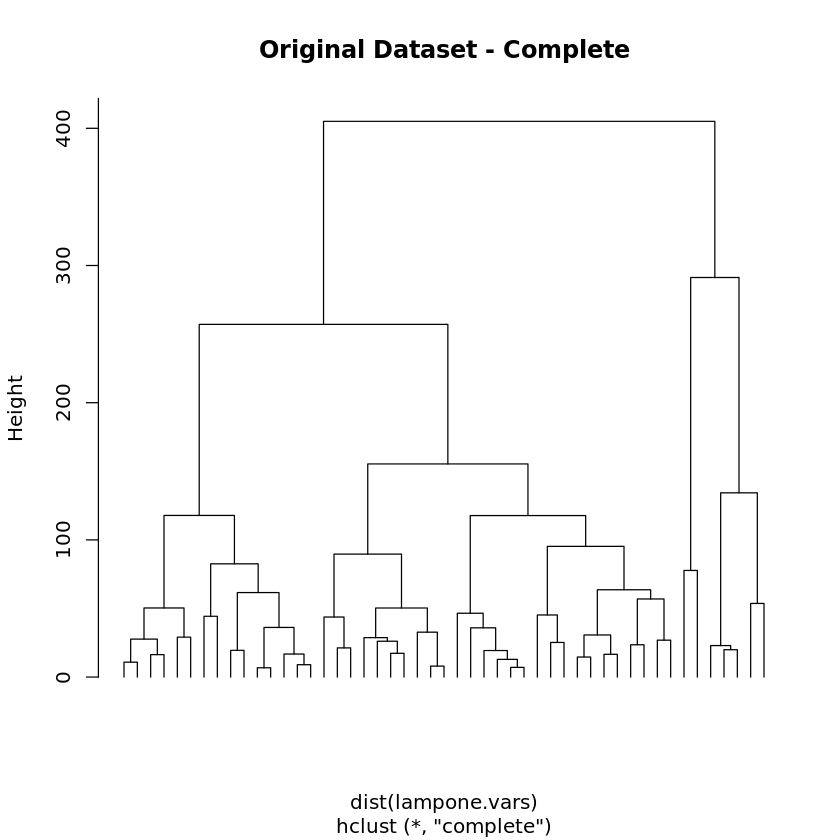

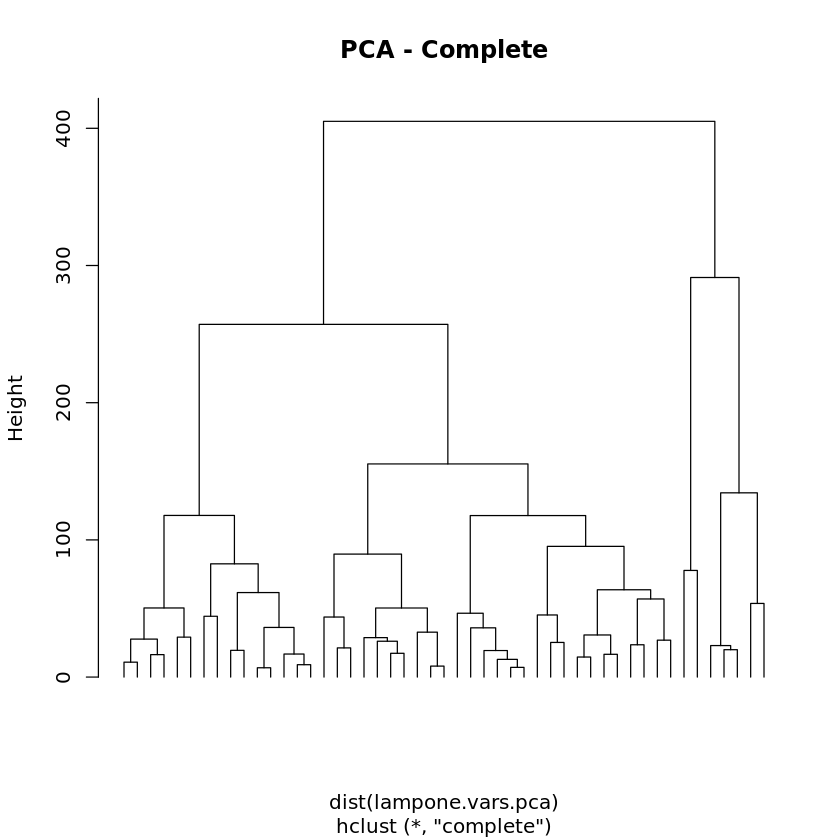

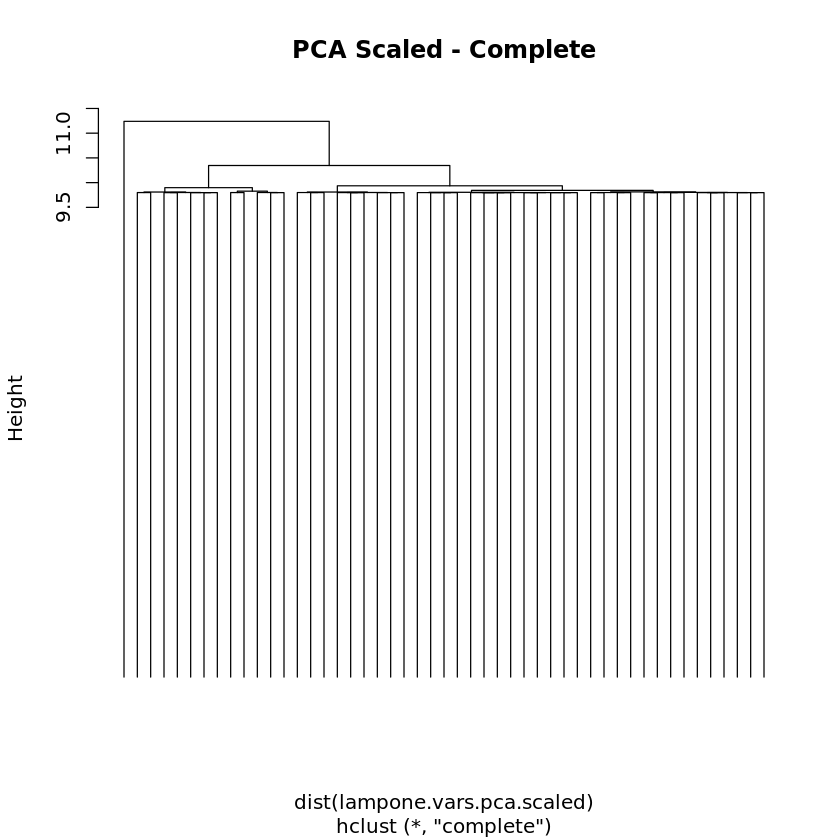

In [151]:
lampone.vars.hc <- hclust(dist(lampone.vars), method="complete")
plot(lampone.vars.hc,  labels = FALSE, hang = -1, main = "Original Dataset - Complete")

lampone.vars.pca.hc <- hclust(dist(lampone.vars.pca), method="complete")
plot(lampone.vars.pca.hc,  labels = FALSE, hang = -1, main = "PCA - Complete")

lampone.vars.pca.scaled.hc <- hclust(dist(lampone.vars.pca.scaled), method="complete")
plot(lampone.vars.pca.scaled.hc,  labels = FALSE, hang = -1, main = "PCA Scaled - Complete")

No hay mucha diferencia entre usar el dataset original y aplicarle el PCA al dataset. El `scale` parece estar empeorando la performance.

## Ejercicio 2

In [3]:
# Calcula el Gap(k) para el algoritmo gap_statistic
gap <- function(k, B, wkb.vector, Wk) {
    acumulador <- 0 
    for(b in 1:B){
        acumulador <- acumulador + (log(wkb.vector[b]) - log(Wk))
    }
    return(acumulador/B)
}

deviation <- function(B, wkb.vector){
    l <- 0
    for(b in 1:B){
        l <- l + log(wkb.vector[b])
    }
    l <- l/B
    sdk <- 0
    for(b in 1:B){
        sdk <- sdk + (log(wkb.vector[b]) - l)^2
    }
    return(sqrt(sdk/B))
}

# Genera un dataset con ruido uniforme similar al que toma como argumento
generate_uniform_dataset <- function(dataset.original){
    nrows <- nrow(dataset.original)
    ncols <- ncol(dataset.original)

    # Hacemos una pca del dataset original
    dataset.pca <- prcomp(dataset.original, retx=TRUE)$x

    uniform.dataset <- c()

    # Iteramos por cada columna generando ruido uniforme de acuerdo a los valores 
    # máximos y minimos de la columna del dataset.pca
    for(i in 1:ncols){
        columns <- runif(nrows, min(dataset.pca[,i]), max(dataset.pca[,i]))
        uniform.dataset <- cbind(uniform.dataset, columns)
    }
    
    return(uniform.dataset)
}

In [4]:
# GAP Statistic
gap_statistic <- function(dataset, k.max, B) {
    wkb.vector <- c()
    prev.gap.k <- NULL
    k.default <- 2

    for(k in 2:(k.max + 1)){ # k.max + 1 para que el se incluya el k.max en la condición de verificación
        km <- kmeans(dataset, k)
        # Obtenemos la variación total intra-cluster
        Wk <- km$tot.withinss

        for(b in 1:B){
            # Generamos dataset con distribución uniforme
            dataset.uniform <- generate_uniform_dataset(dataset)
            # Aplicamos kmeans
            km.uniform <- kmeans(dataset.uniform, k)
            # Obtenemos la variación total intra-cluster y la guardamos
            Wkb <- km.uniform$tot.withinss
            wkb.vector <- c(wkb.vector, Wkb)
        }
        # Calculamos Gap(k)
        gap.k <- gap(k, B, wkb.vector, Wk) 
        # Calculamos la desviación estándar
        sd.k <- deviation(B, wkb.vector)
        sk <- sqrt(1 + 1/B) * sd.k

        # Si se cumple la condición de corte, terminamos y retornamos el k correspondiente, sino seguimos
        if (!is.null(prev.gap.k)){ # No puedo hacer un and en un solo if porque no es lazy :(
            if (prev.gap.k >= gap.k - sk) {
                print("Found k")
                return(k - 1)
            }
        }
        prev.gap.k <- gap.k
    }
    print("Returning default value for k")
    # Si no se encuentra un k, devolvemos el default que es 2
    return(k.default)
} 

In [8]:
k.gap <- gap_statistic(crabs[, 4:8], 10, 500)
k.gap

[1] "Found k"


[1] 10

In [11]:
k.gap.lampone <- gap_statistic(lampone.vars[, 4:8], 10, 500)
k.gap.lampone

[1] "Found k"


[1] 7

In [16]:
k.iris <- gap_statistic(scale(iris[, -5]), 10, 500)
k.iris

[1] "Found k"


[1] 9

In [325]:
# Estabilidad

estabilidad.score <- function(dataset) {
    # x<-iris[,-5]
    n <- dim(dataset)[1]
    #fijo el numero de clusters
    k = 3
    #creo dos indices al azar y hago los clusters
    ind1 <- sample(n, 0.9 * n)
    cc1 <- kmeans(dataset[ind1,], k, nsta=10)$cluster
    ind2 <- sample(n,0.9*n)
    cc2 <- kmeans(dataset[ind2,], k, nsta=10)$cluster
    #pongo los clusters de nuevo en longitud n - quedan 0 los puntos fuera del sample
    v1 <- v2 <- rep(0,n)
    v1[ind1] <- cc1

    v2[ind2]<-cc2
    # creo una matriz m con 1 donde los dos puntos estan en el mismo cluster, 
    # -1 en distinto cluster y 0 si alguno no esta, para cada clustering
    a <- sqrt(v1 %*% t(v1))
    m1 <-a / -a + 2*(a==round(a))
    m1[is.nan(m1)]<-0
    a <- sqrt(v2%*%t(v2))
    m2 <- a / -a + 2*(a==round(a))
    m2[is.nan(m2)]<-0
    # calculo el score, los pares de puntos que estan en la misma situacion en los dos 
    # clustering dividido el total de pares validos.
    validos <- sum(v1*v2>0)
    score <- sum((m1*m2)[upper.tri(m1)]>0)/(validos*(validos-1)/2)
    print(score)
}

# Funciones para generar réplicas de datasets perturbados

estabilidad.subsampling <- function(dataset) {

}

estabilidad.noise <- function(dataset) {

}

estabilidad.proyecciones <- function(dataset) {

}

# Algoritmo para stability

estabilidad <- function(dataset, k.max) {
    for(k in 2 : k.max) {
        dataset.replica <- estabilidad.subsampling(dataset)
    }
}


[1] 0.9791356
